# Atividade 1 MOD_14

### Criando scripting 

• Crie um jupyter notebook com os imports necessários e um código para gerar os
gráficos referentes a base de dados de março, abril, maio, junho e dezembro
(numa célula só ou em várias).

• Como que você poderia fazer para deixar isso mais automatizado? Descreva na
última célula do jupyter notebook o que ajudaria na hora de gerar novos gráficos
pros meses/anos seguintes.

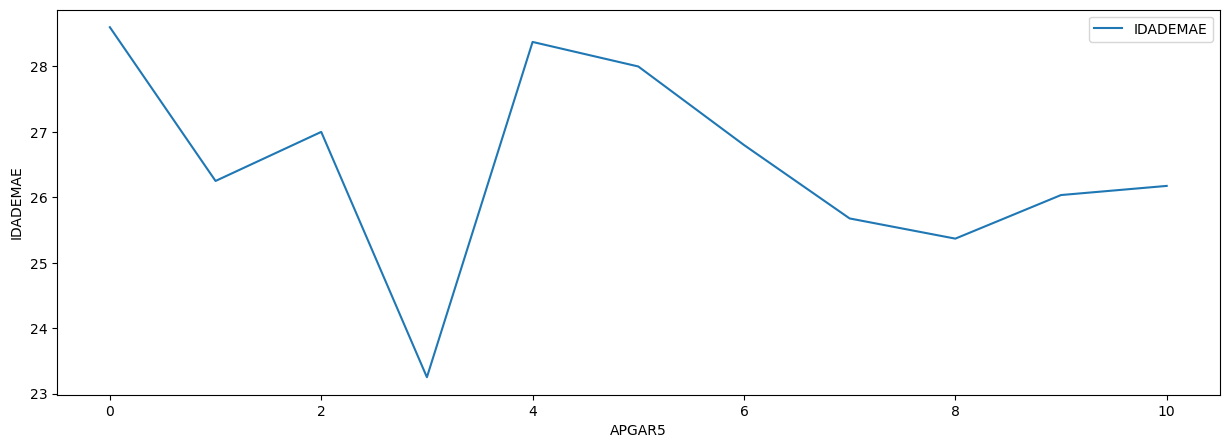

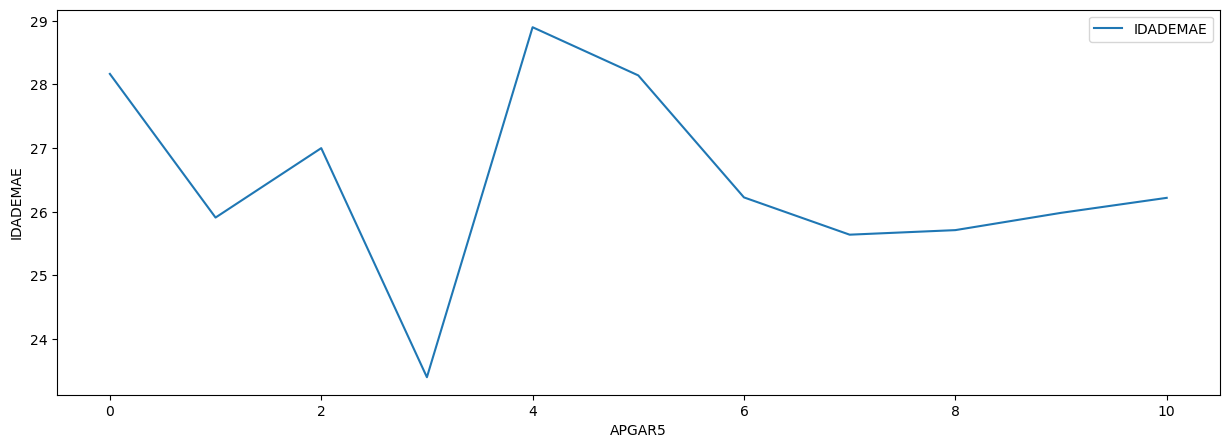

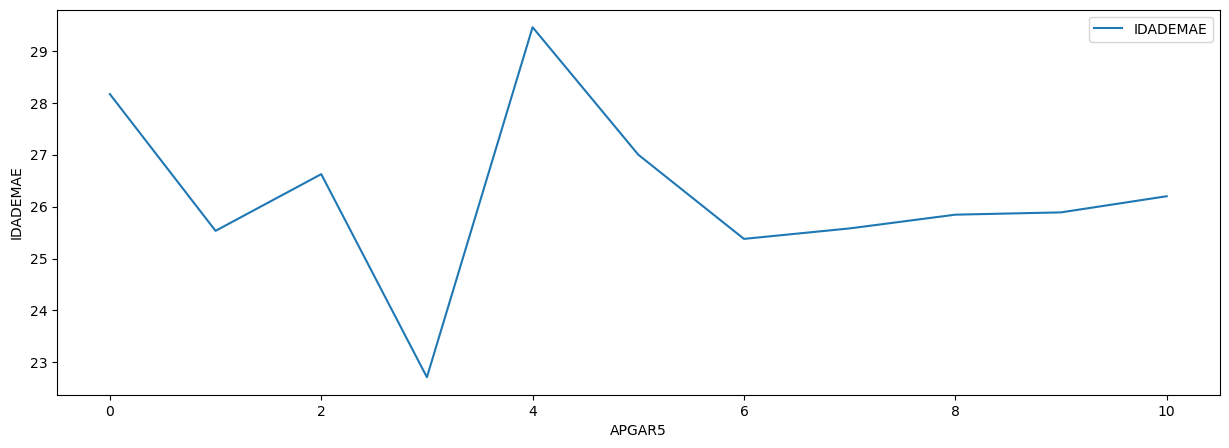

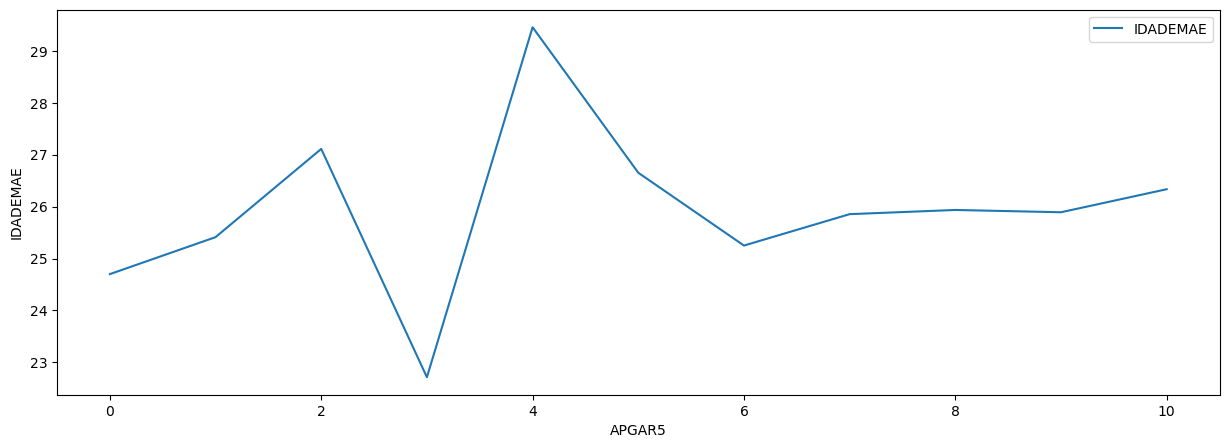

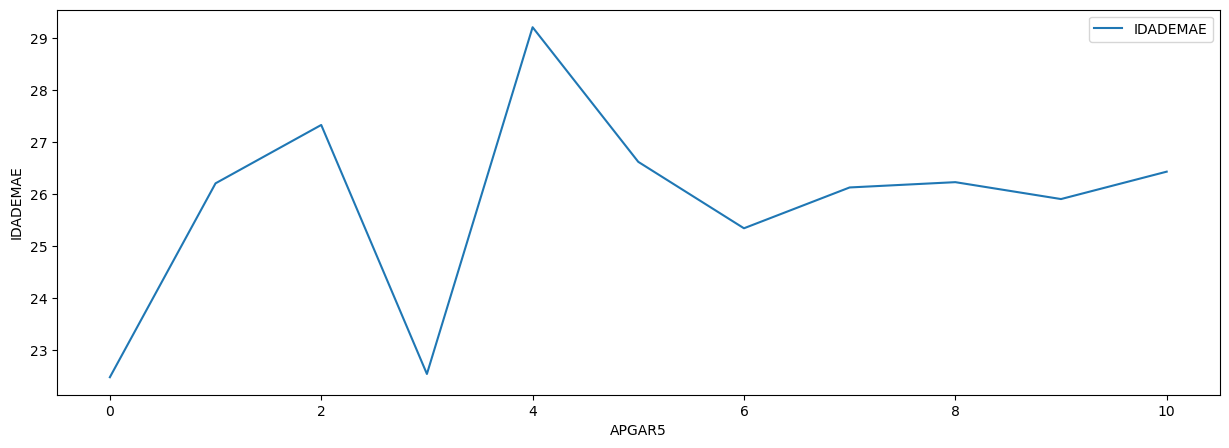

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

def plot_pivot_table(df, value, index, func, ylabel, xlabel, opcao = 'nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).plot(figsize=[15,5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).sort_values(value).plot(figsize=[15,5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).unstack().plot(figsize=[15,5])
    else:
        print('Opção Inválida')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None

# mostra o ultimo mês no DF atual
max_data = df.DTNASC.max()[:7]
# cria um diretorio com o nome output/figs
os.makedirs('./output/figs/'+max_data, exist_ok=True)

df = pd.read_csv('input/SINASC_RO_2019_MAR.csv')
df.head(5)
plot_pivot_table(df, 'IDADEMAE', 'APGAR5', 'mean', 'IDADEMAE','APGAR5')
# salva as figs no diretorio criado 
plt.savefig('./output/figs/'+max_data+'/media peso bebe por escolaridade mae_março.png')

df = pd.read_csv('input/SINASC_RO_2019_ABR.csv')
df.head(5)
plot_pivot_table(df, 'IDADEMAE', 'APGAR5', 'mean', 'IDADEMAE','APGAR5')
plt.savefig('./output/figs/'+max_data+'/media peso bebe por escolaridade mae_abril.png')

df = pd.read_csv('input/SINASC_RO_2019_MAI.csv')
df.head(5)
plot_pivot_table(df, 'IDADEMAE', 'APGAR5', 'mean', 'IDADEMAE','APGAR5')
plt.savefig('./output/figs/'+max_data+'/media peso bebe por escolaridade mae_maio.png')

df = pd.read_csv('input/SINASC_RO_2019_JUN.csv')
df.head(5)
plot_pivot_table(df, 'IDADEMAE', 'APGAR5', 'mean', 'IDADEMAE','APGAR5')
plt.savefig('./output/figs/'+max_data+'/media peso bebe por escolaridade mae_junho.png')

df = pd.read_csv('input/SINASC_RO_2019_DEZ.csv')
df.head(5)
plot_pivot_table(df, 'IDADEMAE', 'APGAR5', 'mean', 'IDADEMAE','APGAR5')
plt.savefig('./output/figs/'+max_data+'/media peso bebe por escolaridade mae_dez.png')

#### Irei automatizar o código para gerar gráficos de forma mais eficiente para todos os meses, vou usar um loop que itera pelos arquivos de entrada e executa as operações de forma dinâmica. tambem parametrizar o nome dos meses e construir os caminhos de saída automaticamente. 

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Função para plotar a tabela dinâmica e salvar o gráfico
def plot_pivot_table(df, value, index, func, ylabel, xlabel, output_path):
    pivot = pd.pivot_table(df, values=value, index=index, aggfunc=func)
    pivot.plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.savefig(output_path)  # Salva o gráfico no caminho especificado
    plt.close()  # Fecha o gráfico para evitar sobreposição em loops

# Lista de meses e respectivos arquivos
meses = ['MAR', 'ABR', 'MAI', 'JUN', 'DEZ']
base_path = './input/SINASC_RO_2019_'  # Caminho base dos arquivos
output_base = './output/figs/'         # Diretório base para salvar os gráficos

# Iterar pelos meses
for mes in meses:
    # Monta o caminho do arquivo CSV
    file_path = f'{base_path}{mes}.csv'
    
    # Carregar o DataFrame
    df = pd.read_csv(file_path)
    
    # Determina o ano e mês da análise (baseado no último registro da coluna DTNASC)
    max_data = df['DTNASC'].max()[:7]
    
    # Cria o diretório de saída (se não existir)
    output_dir = f'{output_base}{max_data}'
    os.makedirs(output_dir, exist_ok=True)
    
    # Define o caminho do arquivo para salvar o gráfico
    output_file = f'{output_dir}/media_peso_bebe_por_escolaridade_mae_{mes.lower()}.png'
    
    # Plota a tabela dinâmica e salva o gráfico
    plot_pivot_table(
        df,
        value='IDADEMAE', 
        index='APGAR5', 
        func='mean', 
        ylabel='Média da Idade da Mãe', 
        xlabel='APGAR 5 Minutos',
        output_path=output_file
    )
    print(f'Gráfico salvo: {output_file}')

Gráfico salvo: ./output/figs/2019-03/media_peso_bebe_por_escolaridade_mae_mar.png
Gráfico salvo: ./output/figs/2019-04/media_peso_bebe_por_escolaridade_mae_abr.png
Gráfico salvo: ./output/figs/2019-05/media_peso_bebe_por_escolaridade_mae_mai.png
Gráfico salvo: ./output/figs/2019-06/media_peso_bebe_por_escolaridade_mae_jun.png
Gráfico salvo: ./output/figs/2019-12/media_peso_bebe_por_escolaridade_mae_dez.png


# Atividade 2

### Programando um Scripting para base SINASC

* Crie um script que receba uma lista de abreviaturas de meses (MAR, ABR, MAI,
JUN, etc) como argumento e gera as pastas e gráficos necessários para os meses
de referência.